# Compute performance metrics for the given Y and Y_score without sklearn

# A, performance metrics for  5_b.csv

In [1]:
import numpy as np
import pandas as pd

df=pd.read_csv('5_a.csv')
df['y']=np.where(df['y']==1,1,0)
df['y_pred'] = np.where(df['proba']>=0.5, 1, 0)
df.y.value_counts()

# CONFUSION MATRIX

x=df.y.value_counts()
P=x[1]
N=x[0]
df['y_pred'] = np.where(df['proba']>0.5, 1, 0)
TP=((df['y']==1) & (df['y_pred'] == 1)).sum()#true positive
TN=((df['y']==0) & (df['y_pred'] == 0)).sum()#true negative
FP=((df['y']==0) & (df['y_pred'] == 1)).sum()#false positive
FN=((df['y']==1) & (df['y_pred'] == 0)).sum()#false negative

confusion_matrix=np.array([[TN,FN], [FP,TP]])
print(confusion_matrix)


[[    0     0]
 [  100 10000]]


In [2]:
precision=TP/(TP+FP)#of all classified as P how many are actually P
recall=TP/(TP+FN)# of all true values how many did the model detect to be true
f1=(2*precision*recall/(precision+recall))
print('The f1 score is :', f1)

The f1 score is : 0.9950248756218906


In [3]:
#AREA UNDER RECIEVER OPERATING CHARACTERISTIC CURVE

df = df.sort_values( by= ["proba"], ascending = False)


TPR_ARR=[]
FPR_ARR=[]
for threshold in (df['proba'].unique()):
    df['y_pred'] =np.where( df['proba'] >= threshold, 1,0)

    
    TP1 =((df['y']==1) & (df['y_pred'] == 1)).sum()#true positive
    TN1=((df['y']==0) & (df['y_pred'] == 0)).sum()#true negative
    FP1=((df['y']==0) & (df['y_pred'] == 1)).sum()#false positive
    FN1=((df['y']==1) & (df['y_pred'] == 0)).sum()#false negative
    TPR=TP1/(TP1+FN1)
    FPR=FP1/(FP1+TN1)
    TPR_ARR.append(TPR)
    FPR_ARR.append(FPR)


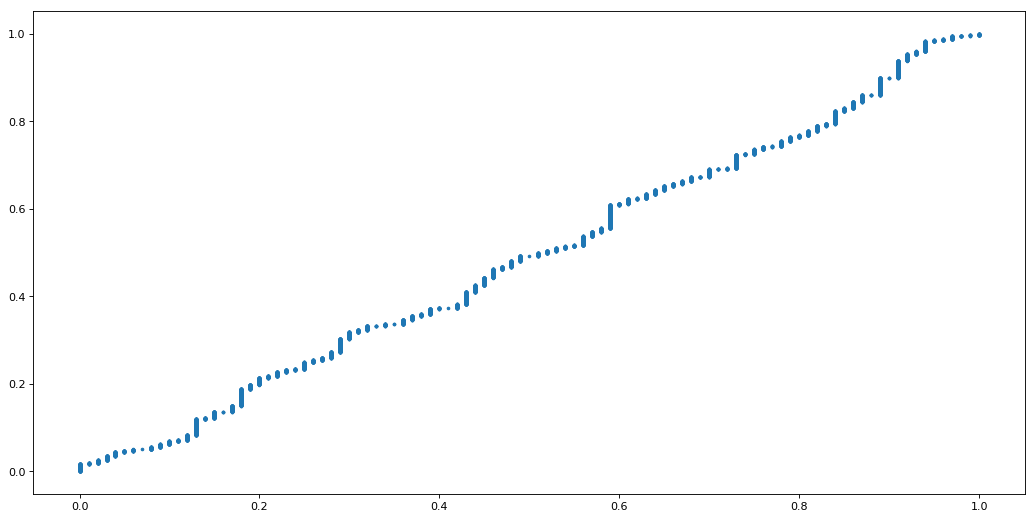

0.48829900000000004

In [5]:
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

figure(figsize=(16, 8), dpi=80)
plt.scatter(FPR_ARR, TPR_ARR,s=5)
plt.show()

AUC = np.trapz(TPR_ARR, FPR_ARR)
AUC

In [6]:
accuracy=(TP+TN)/(P+N)
print(accuracy*100)

99.00990099009901


## for an imbalanced dataset, accuracy score can be very misleading

# B performance metrics for the 5_b.csv

In [7]:
import numpy as np
import pandas as pd

df=pd.read_csv('5_b.csv')
df['y']=np.where(df['y']==1,1,0)
df['y_pred'] = np.where(df['proba']<0.5, 1, 0)
df.y.value_counts()


x=df.y.value_counts()
P=x[1]
N=x[0]
df['y_pred'] = np.where(df['proba']<0.5, 1, 0)
TP =((df['y']==1) & (df['y_pred'] == 1)).sum()#true positive
TN=((df['y']==0) & (df['y_pred'] == 0)).sum()#true negative
FP=((df['y']==0) & (df['y_pred'] == 1)).sum()#false positive
FN=((df['y']==1) & (df['y_pred'] == 0)).sum()#false negative

confusion_matrix=np.array([[TN,FN], [FP,TP]])
print(confusion_matrix)



[[ 239   55]
 [9761   45]]


In [8]:
#f1 score
precision=TP/(TP+FP)#of all classified as P how many are actually P
recall=TP/(TP+FN)# of all true values how many did the model detect to be true
f1=(2*precision*recall/(precision+recall))
f1


0.009085402786190187

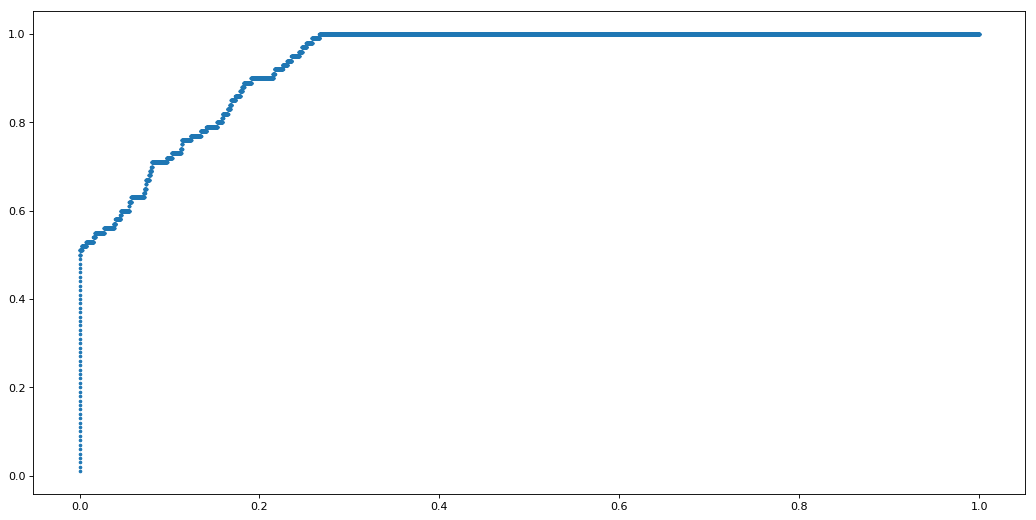

0.9377570000000001

In [9]:
#AREA UNDER RECIEVER OPERATING CHARACTERISTIC CURVE

df = df.sort_values( by= ["proba"], ascending = False)


TPR_ARR=[]
FPR_ARR=[]
for threshold in (df['proba'].unique()):
    df['y_pred'] =np.where( df['proba'] >= threshold, 1,0)

    
    TP =((df['y']==1) & (df['y_pred'] == 1)).sum()#true positive
    TN=((df['y']==0) & (df['y_pred'] == 0)).sum()#true negative
    FP=((df['y']==0) & (df['y_pred'] == 1)).sum()#false positive
    FN=((df['y']==1) & (df['y_pred'] == 0)).sum()#false negative
    TPR=TP/(TP+FN)
    FPR=FP/(FP+TN)
    TPR_ARR.append(TPR)
    FPR_ARR.append(FPR)
    
    
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

figure(figsize=(16, 8), dpi=80)
plt.scatter(FPR_ARR, TPR_ARR,s=5)
plt.show()

AUC = np.trapz(TPR_ARR, FPR_ARR)
AUC

In [10]:
accuracy=(TP+TN)/(P+N)
print(accuracy*100)

0.9900990099009901


#  C. Compute the best threshold

In [11]:
import numpy as np
import pandas as pd

df=pd.read_csv('5_c.csv')
df['y']=np.where(df['y']==1,1,0)

df = df.sort_values( by= ["prob"], ascending = False)

acc_dict={}
for threshold in (df['prob'].unique()):
    df['y_pred'] =np.where( df['prob'] >= threshold, 1,0)
    FP=((df['y']==0) & (df['y_pred'] == 1)).sum()#false positive
    FN=((df['y']==1) & (df['y_pred'] == 0)).sum()#false negative
    
    A=500*FN+100*FP
    acc_dict.update({A : threshold})


In [12]:
min_threshold=(acc_dict[min(acc_dict.keys())])
print('the best threshold value of probability which gives lowest value of metric A is :', min_threshold)


the best threshold value of probability which gives lowest value of metric A is : 0.2300390278970873


# D. Compute performance metrics(for regression)

In [13]:
df=pd.read_csv('5_d.csv')

#mean square error
ERRS=[]
for i in range(len(df.y)):
    e=(df.y[i]-df.pred[i])**2
    ERRS.append(e)
E=sum(ERRS)
MSE=(1/(len(df.y)))*(E)
    
print(MSE)

177.16569974554707


In [14]:
ERRORS=[]
for i in range(len(df.y)):
    e1=abs(df.pred[i]-df.y[i])
    ERRORS.append(e1)

act_vals=df['y']
MAPE=(sum(ERRORS))/(sum(act_vals))

print(MAPE)

0.1291202994009687


In [15]:
#R^2
# residual sum of squares
y_avg=np.mean(df.y)
E2=[]
for i in range(len(df.y)):
    e2=(df.y[i]-df.pred[i])**2
    E2.append(e2)
ss_res=sum(E2)

In [16]:
#total sum of squares
E3=[]
for i in range(len(df.y)):
    e3=(df.y[i]-y_avg)**2
    E3.append(e3)
ss_tot=sum(E3)

In [17]:
#r_squared

r_squared=(1-(ss_res/ss_tot))
r_squared

0.9563582786990964